In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from prophet import Prophet
import joblib


In [ ]:
data = pd.read_csv("State_time_series.csv")

In [ ]:
data.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 82 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Date                                                           13212 non-null  object 
 1   RegionName                                                     13212 non-null  object 
 2   DaysOnZillow_AllHomes                                          4845 non-null   float64
 3   InventorySeasonallyAdjusted_AllHomes                           4896 non-null   float64
 4   InventoryRaw_AllHomes                                          4896 non-null   float64
 5   MedianListingPricePerSqft_1Bedroom                             3586 non-null   float64
 6   MedianListingPricePerSqft_2Bedroom                             4534 non-null   float64
 7   MedianListingPricePerSqft_3Bedroom                        

In [ ]:
data.describe()

,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
count,4845.000000,4896.000000,4896.000000,3586.000000,4534.000000,4607.000000,4677.000000,4569.000000,4674.000000,4149.000000,...,12316.000000,11682.000000,12438.000000,12438.000000,12524.000000,4254.000000,4336.000000,4336.000000,4336.000000,4254.000000
mean,110.117363,33292.662786,33299.013685,182.470536,135.490657,129.448515,133.458743,135.668871,136.660141,163.547190,...,102669.974018,156769.885294,169753.408908,174154.381733,293973.810284,1321.329807,1318.055581,0.929661,1233.050277,1327.520686
std,27.474195,34926.704422,35014.163714,99.809488,74.250919,58.837700,58.339837,64.920918,68.762969,99.420552,...,49705.352957,79694.996337,83882.409974,92243.367198,147829.063258,371.006175,368.783157,0.284986,369.426763,383.309444
min,49.250000,972.000000,911.000000,57.142857,60.000000,56.476684,61.804124,63.775510,62.143473,61.915888,...,32600.000000,42200.000000,38200.000000,37900.000000,70900.000000,799.000000,799.000000,0.560000,713.000000,799.000000
25%,90.250000,9828.500000,9756.250000,125.688504,92.158518,93.282743,99.601594,99.082187,96.009566,113.083451,...,66600.000000,111300.000000,114500.000000,115000.000000,194700.000000,1047.000000,1036.000000,0.728000,959.750000,1039.250000
50%,108.500000,21712.500000,21289.000000,162.754210,121.300723,116.626794,119.816221,119.751076,120.581983,140.996376,...,87400.000000,134700.000000,144750.000000,147300.000000,251100.000000,1210.000000,1210.000000,0.862000,1126.000000,1220.000000
75%,126.750000,47453.000000,46891.000000,202.629803,152.242031,143.188721,144.752714,149.352921,153.443320,177.074899,...,128200.000000,175800.000000,207600.000000,211775.000000,349400.000000,1474.000000,1477.000000,1.074000,1399.500000,1467.750000
max,251.625000,260687.000000,268055.000000,627.551020,550.639135,460.465116,480.769231,617.955266,520.718864,1000.000000,...,335600.000000,782900.000000,620400.000000,737500.000000,988100.000000,2690.000000,2653.000000,2.294000,2606.000000,2754.000000


In [ ]:
data.shape

(13212, 82)

In [ ]:
print(data.Date)

0        1996-04-30
1        1996-04-30
2        1996-04-30
3        1996-04-30
4        1996-04-30
            ...    
13207    2017-12-31
13208    2017-12-31
13209    2017-12-31
13210    2017-12-31
13211    2017-12-31
Name: Date, Length: 13212, dtype: object


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.sort_values(['RegionName', 'Date']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 82 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           13212 non-null  datetime64[ns]
 1   RegionName                                                     13212 non-null  object        
 2   DaysOnZillow_AllHomes                                          4845 non-null   float64       
 3   InventorySeasonallyAdjusted_AllHomes                           4896 non-null   float64       
 4   InventoryRaw_AllHomes                                          4896 non-null   float64       
 5   MedianListingPricePerSqft_1Bedroom                             3586 non-null   float64       
 6   MedianListingPricePerSqft_2Bedroom                             4534 non-null   float64       


In [ ]:
print(data.Date)

0       1996-04-30
1       1996-05-31
2       1996-06-30
3       1996-07-31
4       1996-08-31
           ...    
13207   2017-08-31
13208   2017-09-30
13209   2017-10-31
13210   2017-11-30
13211   2017-12-31
Name: Date, Length: 13212, dtype: datetime64[ns]


In [ ]:
print(type(data.Date))

<class 'pandas.core.series.Series'>


In [ ]:
data2 = data[['Date', 'RegionName', 'ZHVI_AllHomes']].copy()
print(data2.shape)


(13212, 3)


In [ ]:
#handling missing values using interpolate method
data2['ZHVI_AllHomes_updated'] = data2.groupby('RegionName')['ZHVI_AllHomes'].transform(
    lambda x: x.interpolate(method='linear').ffill().bfill()
)

In [ ]:
print(data2.head())

        Date RegionName  ZHVI_AllHomes  ZHVI_AllHomes_updated
0 1996-04-30    Alabama        79500.0                79500.0
1 1996-05-31    Alabama        79200.0                79200.0
2 1996-06-30    Alabama        79500.0                79500.0
3 1996-07-31    Alabama        79700.0                79700.0
4 1996-08-31    Alabama        79700.0                79700.0


In [ ]:
data2['RegionName'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'DistrictofColumbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'NewHampshire',
       'NewJersey', 'NewMexico', 'NewYork', 'NorthCarolina',
       'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'RhodeIsland', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'UnitedStates', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
#preparing the data for prophet
pdata = data2[['Date', 'RegionName', 'ZHVI_AllHomes_updated']].copy()
pdata = pdata.rename(columns={
    'Date': 'ds',
    'ZHVI_AllHomes_cleaned': 'y'
})

print("Shape:", pdata.shape)
print("Columns:", pdata.columns.tolist())
print(pdata.head())


print(f"\nDate range: {pdata['ds'].min()} to {pdata['ds'].max()}")
print(f"Number of regions: {pdata['RegionName'].nunique()}")
print(f"Average data points per region: {len(pdata) / pdata['RegionName'].nunique():.0f}")

Shape: (13212, 3)
Columns: ['ds', 'RegionName', 'ZHVI_AllHomes_updated']
          ds RegionName  ZHVI_AllHomes_updated
0 1996-04-30    Alabama                79500.0
1 1996-05-31    Alabama                79200.0
2 1996-06-30    Alabama                79500.0
3 1996-07-31    Alabama                79700.0
4 1996-08-31    Alabama                79700.0

Date range: 1996-04-30 00:00:00 to 2017-12-31 00:00:00
Number of regions: 52
Average data points per region: 254


In [ ]:
pdata.head()

,ds,RegionName,ZHVI_AllHomes_updated
0,1996-04-30,Alabama,79500.0
1,1996-05-31,Alabama,79200.0
2,1996-06-30,Alabama,79500.0
3,1996-07-31,Alabama,79700.0
4,1996-08-31,Alabama,79700.0


In [ ]:
print(pdata)

              ds RegionName  ZHVI_AllHomes_updated
0     1996-04-30    Alabama                79500.0
1     1996-05-31    Alabama                79200.0
2     1996-06-30    Alabama                79500.0
3     1996-07-31    Alabama                79700.0
4     1996-08-31    Alabama                79700.0
...          ...        ...                    ...
13207 2017-08-31    Wyoming               195600.0
13208 2017-09-30    Wyoming               196200.0
13209 2017-10-31    Wyoming               196400.0
13210 2017-11-30    Wyoming               197700.0
13211 2017-12-31    Wyoming               200200.0

[13212 rows x 3 columns]


In [ ]:
louisiana_data = pdata[pdata['RegionName'] == 'Louisiana'].copy()
print(louisiana_data)

             ds RegionName  ZHVI_AllHomes_updated
4653 1996-04-30  Louisiana                    NaN
4654 1996-05-31  Louisiana                    NaN
4655 1996-06-30  Louisiana                    NaN
4656 1996-07-31  Louisiana                    NaN
4657 1996-08-31  Louisiana                    NaN
...         ...        ...                    ...
4909 2017-08-31  Louisiana                    NaN
4910 2017-09-30  Louisiana                    NaN
4911 2017-10-31  Louisiana                    NaN
4912 2017-11-30  Louisiana                    NaN
4913 2017-12-31  Louisiana                    NaN

[261 rows x 3 columns]


In [ ]:
print(pdata)

              ds RegionName  ZHVI_AllHomes_updated
0     1996-04-30    Alabama                79500.0
1     1996-05-31    Alabama                79200.0
2     1996-06-30    Alabama                79500.0
3     1996-07-31    Alabama                79700.0
4     1996-08-31    Alabama                79700.0
...          ...        ...                    ...
13207 2017-08-31    Wyoming               195600.0
13208 2017-09-30    Wyoming               196200.0
13209 2017-10-31    Wyoming               196400.0
13210 2017-11-30    Wyoming               197700.0
13211 2017-12-31    Wyoming               200200.0

[13212 rows x 3 columns]


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
print(pdata)

              ds          RegionName  ZHVI_AllHomes_updated
0     1996-04-30             Alabama                79500.0
1     1996-05-31             Alabama                79200.0
2     1996-06-30             Alabama                79500.0
3     1996-07-31             Alabama                79700.0
4     1996-08-31             Alabama                79700.0
5     1996-09-30             Alabama                79700.0
6     1996-10-31             Alabama                80100.0
7     1996-11-30             Alabama                80600.0
8     1996-12-31             Alabama                80800.0
9     1997-01-31             Alabama                80700.0
10    1997-02-28             Alabama                80900.0
11    1997-03-31             Alabama                81300.0
12    1997-04-30             Alabama                81300.0
13    1997-05-31             Alabama                80900.0
14    1997-06-30             Alabama                80900.0
15    1997-07-31             Alabama    

In [ ]:

trained_models = {}
all_states = pdata['RegionName'].unique()
for state in all_states:
    print(f"--- Processing {state} ---")
    state_data = pdata[pdata['RegionName'] == state].copy()
    state_data = state_data.rename(columns={'ZHVI_AllHomes_updated': 'y'})
    if state_data['y'].notnull().sum() < 2:
        print(f"--> Skipping {state} due to insufficient valid data.")
        continue
    print(f"Training model for {state}...")
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=0.08
    )

    model.fit(state_data[['ds', 'y']])

    trained_models[state] = model
print("All possible models have been trained successfully!")
print(f"Total models trained: {len(trained_models)}")

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/127a3ao7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/2lu6x4ua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76999', 'data', 'file=/tmp/tmpvb9zqir3/127a3ao7.json', 'init=/tmp/tmpvb9zqir3/2lu6x4ua.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelw3p50jqi/prophet_model-20251003123321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing Alabama ---
Training model for Alabama...


12:33:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/ffjnutzv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/1k2bb_9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74717', 'data', 'file=/tmp/tmpvb9zqir3/ffjnutzv.json', 'init=/tmp/tmpvb9zqir3/1k2bb_9t.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelwat71o1c/prophet_model-20251003123321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/fr952j0v.json


--- Processing Alaska ---
Training model for Alaska...
--- Processing Arizona ---
Training model for Arizona...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/3dwffxg0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40917', 'data', 'file=/tmp/tmpvb9zqir3/fr952j0v.json', 'init=/tmp/tmpvb9zqir3/3dwffxg0.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelk10v977w/prophet_model-20251003123321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/epsbumws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/wc69hmb_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

--- Processing Arkansas ---
Training model for Arkansas...
--- Processing California ---
Training model for California...


12:33:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/2n9ep54x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/d1aim4qt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14053', 'data', 'file=/tmp/tmpvb9zqir3/2n9ep54x.json', 'init=/tmp/tmpvb9zqir3/d1aim4qt.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelpvlzwebh/prophet_model-20251003123322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing Colorado ---
Training model for Colorado...


12:33:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/2juntuhu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/zc5vmxdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96646', 'data', 'file=/tmp/tmpvb9zqir3/2juntuhu.json', 'init=/tmp/tmpvb9zqir3/zc5vmxdb.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelgxpp57jm/prophet_model-20251003123322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing Connecticut ---
Training model for Connecticut...


12:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/duvht2v5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/2qyty4sv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44145', 'data', 'file=/tmp/tmpvb9zqir3/duvht2v5.json', 'init=/tmp/tmpvb9zqir3/2qyty4sv.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelpghm5_eh/prophet_model-20251003123323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing Delaware ---
Training model for Delaware...


12:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/vpvovzfr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/3_lmlliz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45551', 'data', 'file=/tmp/tmpvb9zqir3/vpvovzfr.json', 'init=/tmp/tmpvb9zqir3/3_lmlliz.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelhl7qx3mu/prophet_model-20251003123323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


--- Processing DistrictofColumbia ---
Training model for DistrictofColumbia...
--- Processing Florida ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/a48pvhe8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/8jp2hi3z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30629', 'data', 'file=/tmp/tmpvb9zqir3/a48pvhe8.json', 'init=/tmp/tmpvb9zqir3/8jp2hi3z.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelznfvoo6j/prophet_model-20251003123323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for Florida...


12:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/jzw71s87.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/1vnrn2s2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82531', 'data', 'file=/tmp/tmpvb9zqir3/jzw71s87.json', 'init=/tmp/tmpvb9zqir3/1vnrn2s2.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_model5mvde_50/prophet_model-20251003123323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing Georgia ---
Training model for Georgia...


12:33:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/1y_epsk_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/blq1up_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2008', 'data', 'file=/tmp/tmpvb9zqir3/1y_epsk_.json', 'init=/tmp/tmpvb9zqir3/blq1up_o.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelqw8_tura/prophet_model-20251003123324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing Hawaii ---
Training model for Hawaii...


12:33:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/z79y209r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/um4hmczq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83615', 'data', 'file=/tmp/tmpvb9zqir3/z79y209r.json', 'init=/tmp/tmpvb9zqir3/um4hmczq.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelsy_7qwwg/prophet_model-20251003123324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing Idaho ---
Training model for Idaho...


12:33:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/_q33spaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/zku8nnay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65075', 'data', 'file=/tmp/tmpvb9zqir3/_q33spaj.json', 'init=/tmp/tmpvb9zqir3/zku8nnay.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelzin4lj3z/prophet_model-20251003123324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing Illinois ---
Training model for Illinois...


12:33:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/vnvdadlu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/41gqr6py.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21953', 'data', 'file=/tmp/tmpvb9zqir3/vnvdadlu.json', 'init=/tmp/tmpvb9zqir3/41gqr6py.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_model1z0gzszg/prophet_model-20251003123325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing Indiana ---
Training model for Indiana...


12:33:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/i_hgwi9n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/72mbbark.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77171', 'data', 'file=/tmp/tmpvb9zqir3/i_hgwi9n.json', 'init=/tmp/tmpvb9zqir3/72mbbark.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_model69nhkrbs/prophet_model-20251003123325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


--- Processing Iowa ---
Training model for Iowa...
--- Processing Kansas ---
Training model for Kansas...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/vk7tq1a3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/urkmpvzm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41657', 'data', 'file=/tmp/tmpvb9zqir3/vk7tq1a3.json', 'init=/tmp/tmpvb9zqir3/urkmpvzm.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelmm9qu3q6/prophet_model-20251003123325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/a8f5rweg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/8tnf1mi6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

--- Processing Kentucky ---
Training model for Kentucky...
--- Processing Louisiana ---
--> Skipping Louisiana due to insufficient valid data.
--- Processing Maine ---
Training model for Maine...


12:33:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/p9ckcmi8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/ddmrwee2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91574', 'data', 'file=/tmp/tmpvb9zqir3/p9ckcmi8.json', 'init=/tmp/tmpvb9zqir3/ddmrwee2.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_model63vrd0x0/prophet_model-20251003123326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing Maryland ---
Training model for Maryland...


12:33:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/7i_plek8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/vih0l8rp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69380', 'data', 'file=/tmp/tmpvb9zqir3/7i_plek8.json', 'init=/tmp/tmpvb9zqir3/vih0l8rp.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelkfg2bfxs/prophet_model-20251003123326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


--- Processing Massachusetts ---
Training model for Massachusetts...
--- Processing Michigan ---
Training model for Michigan...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/3osb2e8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/tcd1_f71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17349', 'data', 'file=/tmp/tmpvb9zqir3/3osb2e8l.json', 'init=/tmp/tmpvb9zqir3/tcd1_f71.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_model32qk80jj/prophet_model-20251003123326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/c0sr1fx1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/kvh5crl5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

--- Processing Minnesota ---
Training model for Minnesota...
--- Processing Mississippi ---
Training model for Mississippi...


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58826', 'data', 'file=/tmp/tmpvb9zqir3/uzoxx3zv.json', 'init=/tmp/tmpvb9zqir3/nbmntrcj.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelxtd32k10/prophet_model-20251003123326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/5rueh9z8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/4xuyjsve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92701', 'data', 'file=/tmp/tmpvb9zqir3/5rueh9z8.json', 'init=/tm

--- Processing Missouri ---
Training model for Missouri...
--- Processing Montana ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/b5h9a97o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/c01_7e94.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96378', 'data', 'file=/tmp/tmpvb9zqir3/b5h9a97o.json', 'init=/tmp/tmpvb9zqir3/c01_7e94.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelc_woj68n/prophet_model-20251003123327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for Montana...
--- Processing Nebraska ---
Training model for Nebraska...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/u_1i34ds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/kln2ohft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70385', 'data', 'file=/tmp/tmpvb9zqir3/u_1i34ds.json', 'init=/tmp/tmpvb9zqir3/kln2ohft.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_model4jqlxm0c/prophet_model-20251003123327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/09c35sk2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/suirx0rb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

--- Processing Nevada ---
Training model for Nevada...


12:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/vu9h4xtl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/4gsrq388.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98005', 'data', 'file=/tmp/tmpvb9zqir3/vu9h4xtl.json', 'init=/tmp/tmpvb9zqir3/4gsrq388.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelkbg2auef/prophet_model-20251003123327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/e9etyqd9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/pogyjx9i.json
DEBUG:cmdstanpy:idx

--- Processing NewHampshire ---
Training model for NewHampshire...
--- Processing NewJersey ---
Training model for NewJersey...


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23185', 'data', 'file=/tmp/tmpvb9zqir3/e9etyqd9.json', 'init=/tmp/tmpvb9zqir3/pogyjx9i.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelk7p0zk90/prophet_model-20251003123328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/bbarg4tj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/kdfq54jw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67197', 'data', 'file=/tmp/tmpvb9zqir3/bbarg4tj.json', 'init=/tmp/tmpvb9zqir3/kdfq54jw.json', 'output', 'file=/tmp/

--- Processing NewMexico ---
Training model for NewMexico...
--- Processing NewYork ---
Training model for NewYork...


12:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/226kptal.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/6t4a80jq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7667', 'data', 'file=/tmp/tmpvb9zqir3/226kptal.json', 'init=/tmp/tmpvb9zqir3/6t4a80jq.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelns2sv5va/prophet_model-20251003123328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/ppxcei3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/hwl3umrz.json
DEBUG:cmdstanpy:idx 

--- Processing NorthCarolina ---
Training model for NorthCarolina...
--- Processing NorthDakota ---
Training model for NorthDakota...


12:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/bjhy3op_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/gl412e87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2990', 'data', 'file=/tmp/tmpvb9zqir3/bjhy3op_.json', 'init=/tmp/tmpvb9zqir3/gl412e87.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modeludyugb4x/prophet_model-20251003123328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/6zlz2nch.json


--- Processing Ohio ---
Training model for Ohio...
--- Processing Oklahoma ---
Training model for Oklahoma...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/7icict9l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34896', 'data', 'file=/tmp/tmpvb9zqir3/6zlz2nch.json', 'init=/tmp/tmpvb9zqir3/7icict9l.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_model73yjkc39/prophet_model-20251003123328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/dh5jnm2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/k154b6lf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

--- Processing Oregon ---
Training model for Oregon...
--- Processing Pennsylvania ---
Training model for Pennsylvania...


12:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/8slvl3zl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/m7wg6ff_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62656', 'data', 'file=/tmp/tmpvb9zqir3/8slvl3zl.json', 'init=/tmp/tmpvb9zqir3/m7wg6ff_.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelpktortgn/prophet_model-20251003123329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


--- Processing RhodeIsland ---
Training model for RhodeIsland...
--- Processing SouthCarolina ---
Training model for SouthCarolina...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/yh75uti1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/4ue2fdw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52924', 'data', 'file=/tmp/tmpvb9zqir3/yh75uti1.json', 'init=/tmp/tmpvb9zqir3/4ue2fdw3.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelekt_7twl/prophet_model-20251003123329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/n89cg5mw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/tth01qld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

--- Processing SouthDakota ---
Training model for SouthDakota...
--- Processing Tennessee ---
Training model for Tennessee...


12:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/6z7p71w6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/54q58p57.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48584', 'data', 'file=/tmp/tmpvb9zqir3/6z7p71w6.json', 'init=/tmp/tmpvb9zqir3/54q58p57.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modeln2rfimsf/prophet_model-20251003123329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing Texas ---
Training model for Texas...


12:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/4qft3as0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/2tiuhb3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73781', 'data', 'file=/tmp/tmpvb9zqir3/4qft3as0.json', 'init=/tmp/tmpvb9zqir3/2tiuhb3l.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_model4vddlumn/prophet_model-20251003123330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Processing UnitedStates ---
--> Skipping UnitedStates due to insufficient valid data.
--- Processing Utah ---
Training model for Utah...


12:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/vkrx_3_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/hios07j4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18998', 'data', 'file=/tmp/tmpvb9zqir3/vkrx_3_5.json', 'init=/tmp/tmpvb9zqir3/hios07j4.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_model7uyzl0gh/prophet_model-20251003123330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/bvaeb5mh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/r34nq35a.json
DEBUG:cmdstanpy:idx

--- Processing Vermont ---
Training model for Vermont...
--- Processing Virginia ---
Training model for Virginia...


12:33:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/8slmirpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/h80cpi_x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69629', 'data', 'file=/tmp/tmpvb9zqir3/8slmirpt.json', 'init=/tmp/tmpvb9zqir3/h80cpi_x.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_modelj04ban60/prophet_model-20251003123330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqi

--- Processing Washington ---
Training model for Washington...
--- Processing WestVirginia ---
Training model for WestVirginia...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/ay2vp4bq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74350', 'data', 'file=/tmp/tmpvb9zqir3/e9gq5736.json', 'init=/tmp/tmpvb9zqir3/ay2vp4bq.json', 'output', 'file=/tmp/tmpvb9zqir3/prophet_model4jte1waj/prophet_model-20251003123330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/o4ylrdck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvb9zqir3/_fzg9p73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

--- Processing Wisconsin ---
Training model for Wisconsin...
--- Processing Wyoming ---
Training model for Wyoming...


12:33:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


All possible models have been trained successfully!
Total models trained: 50


In [ ]:
#checking the model
state_to_forecast = 'California'
model = trained_models[state_to_forecast]
future_dates = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future_dates)

print(f"\n Forecast for {state_to_forecast}")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



 Forecast for California
            ds           yhat     yhat_lower     yhat_upper
280 2019-08-31  571819.081165  524772.851582  610716.173866
281 2019-09-30  574632.808945  524444.533419  616461.068687
282 2019-10-31  577481.233768  523149.264708  623057.882608
283 2019-11-30  580195.171214  519845.255999  628509.055417
284 2019-12-31  582422.404211  519623.339768  632334.230377


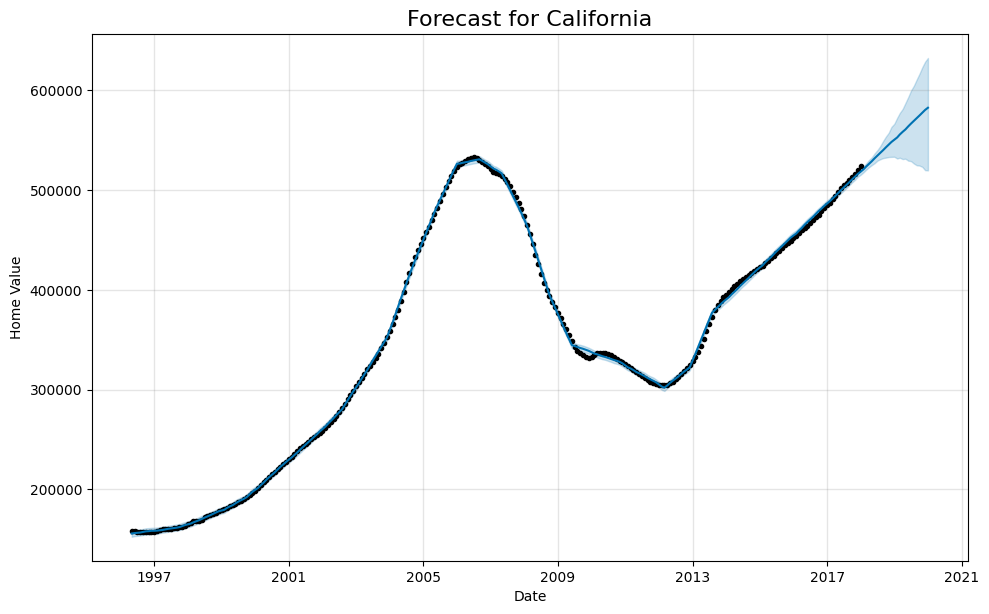

In [ ]:

fig = model.plot(forecast)
plt.title(f'Forecast for {state_to_forecast}', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Home Value')
plt.show()

In [ ]:

state_to_forecast = 'Alabama'
model = trained_models[state_to_forecast]
future_dates = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future_dates)
print(f"\n Forecast for {state_to_forecast}")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


 Forecast for Alabama
            ds           yhat     yhat_lower     yhat_upper
280 2019-08-31  129477.219648  124338.489339  134552.830816
281 2019-09-30  129887.333525  124483.937484  135618.974842
282 2019-10-31  130169.420630  124163.057151  136343.497197
283 2019-11-30  130118.587659  124212.155676  136620.906239
284 2019-12-31  130154.931704  123507.592799  136984.217671


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


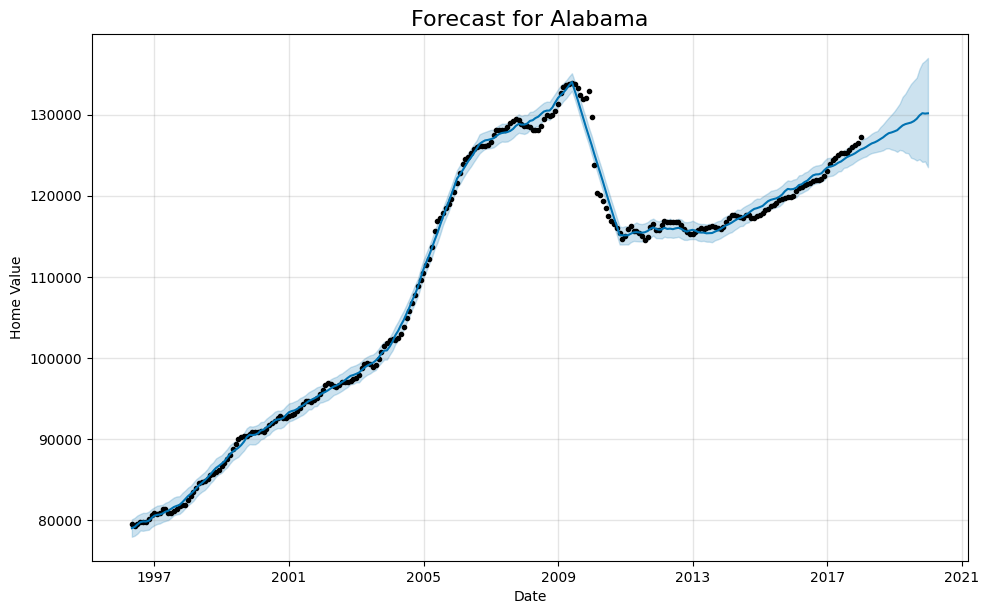

In [ ]:
fig = model.plot(forecast)
plt.title(f'Forecast for {state_to_forecast}', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Home Value')
plt.show()

In [ ]:
file_path = 'prophet_models.joblib'
joblib.dump(trained_models, file_path)

print(f"All {len(trained_models)} models have been successfully saved to: {file_path}")

All 50 models have been successfully saved to: prophet_models.joblib


In [ ]:
loaded_models = joblib.load('prophet_models.joblib')
print(f"Successfully loaded {len(loaded_models)} models.")
Arizona_model = loaded_models['Arizona']
future = Arizona_model.make_future_dataframe(periods=12, freq='M')
forecast = Arizona_model.predict(future)
print("\nForecast using the loaded Arizona model")
print(forecast[['ds', 'yhat']].tail())

Successfully loaded 50 models.

Forecast using the loaded Arizona model
            ds           yhat
268 2018-08-31  238586.841816
269 2018-09-30  239657.816889
270 2018-10-31  240700.204045
271 2018-11-30  241686.759153
272 2018-12-31  242697.439080


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


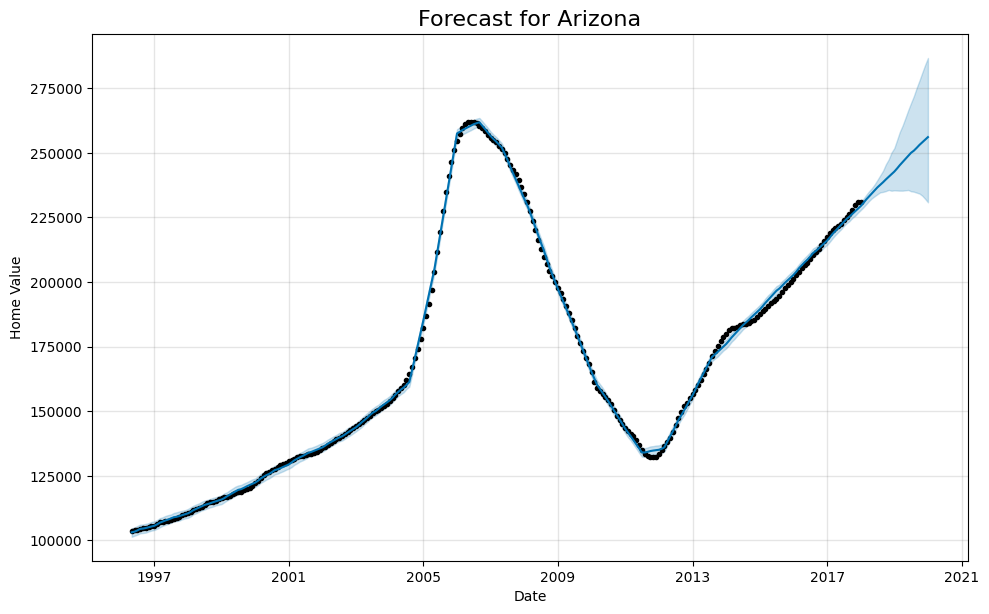

In [ ]:
file_path = 'prophet_models.joblib'
loaded_models = joblib.load(file_path)
state_to_plot = 'Arizona'
if state_to_plot in loaded_models:
    model = loaded_models[state_to_plot]
    future_dates = model.make_future_dataframe(periods=24, freq='M')
    forecast = model.predict(future_dates)
    fig = model.plot(forecast)
    plt.title(f'Forecast for {state_to_plot}', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Home Value')
    plt.grid(True)
    plt.show()
else:
    print(f"Error: A model for '{state_to_plot}' was not found in the loaded file.")
    print(f"Available models are for: {list(loaded_models.keys())}")